# QNT795 Capstone Project 
## College Basketball- Predict Draft Status

In [2]:
#load initial libraries/set columns rows to max
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
## load data college basketball stats 2009-2021 
cb_stats_09_21= pd.read_csv('CollegeBasketballPlayers2009-2021.csv')

C:\Users\smars\AppData\Local\Temp\ipykernel_67396\3239079664.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  cb_stats_09_21= pd.read_csv('CollegeBasketballPlayers2009-2021.csv')


In [3]:
cb_stats_09_21.head()

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [4]:
#check shape
cb_stats_09_21.shape

(61061, 66)

In [6]:
##Derive draft-target from pick column

cb_stats_09_21_draft=cb_stats_09_21

cb_stats_09_21_draft['Drafted'] =np.where(cb_stats_09_21_draft['pick'].notnull(),1,0)

#chek shape of updated dataframe
cb_stats_09_21_draft.shape

(61061, 67)

In [7]:
##change over year of student to a number
cb_stats_09_21_draft['yr_num'] = pd.factorize(cb_stats_09_21_draft['yr'])[0]

In [8]:
#check for columns with null values
cb_stats_09_21_draft.isnull().sum()

player_name                            0
team                                   0
conf                                   0
GP                                     0
Min_per                                0
Ortg                                   0
usg                                    0
eFG                                    0
TS_per                                 0
ORB_per                                0
DRB_per                                0
AST_per                                0
TO_per                                 0
FTM                                    0
FTA                                    0
FT_per                                 0
twoPM                                  0
twoPA                                  0
twoP_per                               0
TPM                                    0
TPA                                    0
TP_per                                 0
blk_per                                0
stl_per                                0
ftr             

## Initial Approach

In [11]:
# Standardize Column Names
cb_stats_09_21_draft.columns = cb_stats_09_21_draft.columns.str.lower().str.replace(' ', '_')

In [13]:
# Identify rows where 'Drafted' equals 1 and 'Rec Rank' is null
rows_to_delete = (cb_stats_09_21_draft['drafted'] == 0) & (cb_stats_09_21_draft['rec_rank'].isnull())

# Remove these rows from the dataset
cleaned_df = cb_stats_09_21_draft[~rows_to_delete]

# Save the cleaned dataset to a new Excel file
#cb_stats_09_21_draft.to_excel('/Users/shih-fanliu/Desktop/QNT 795/cleaned_college_basketball_data.xlsx', index=False)

# Print the shapes of the original and cleaned dataframes as a quick check
print(cb_stats_09_21_draft.shape)
print(cleaned_df.shape)

(61061, 68)
(18647, 68)


In [16]:
cb_stats_09_21_draft_clean=cleaned_df

In [20]:
##check nulls after clean
cb_stats_09_21_draft_clean.isnull().sum()

player_name                           0
team                                  0
conf                                  0
gp                                    0
min_per                               0
ortg                                  0
usg                                   0
efg                                   0
ts_per                                0
orb_per                               0
drb_per                               0
ast_per                               0
to_per                                0
ftm                                   0
fta                                   0
ft_per                                0
twopm                                 0
twopa                                 0
twop_per                              0
tpm                                   0
tpa                                   0
tp_per                                0
blk_per                               0
stl_per                               0
ftr                                   0


In [18]:
##keep pick column using 0 if not picked and value if picked
cb_stats_09_21_draft_clean['pick']=cb_stats_09_21_draft_clean['pick'].fillna(0)

C:\Users\smars\AppData\Local\Temp\ipykernel_67396\1969484156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb_stats_09_21_draft_clean['pick']=cb_stats_09_21_draft_clean['pick'].fillna(0)


In [23]:
## load data college basketball stats 2009-2021 
cb_stats_09_21_draft_clean= pd.read_excel('college_basketball_data_drafted_clean.xlsx')

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##only select numerical columns
cb_draft_num=cb_stats_09_21_draft_clean.select_dtypes(include='number')
cb_draft_num.head()

,Unnamed: 0,gp,min_per,ortg,usg,efg,ts_per,orb_per,drb_per,ast_per,to_per,ftm,fta,ft_per,twopm,twopa,twop_per,tpm,tpa,tp_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,pid,rec_rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,unnamed:_65,drafted,conf_num,yr_num
0,9,30,80.4,92.5,23.0,43.5,45.29,6.4,12.6,11.9,14.5,64,120,0.533,128,281,0.456,12,55,0.218,0.3,2.3,35.7,0.881212,92.1620,2.4,2009,20,17.2,0.945454,36.416442,59.377773,19.545359,53.879533,0.591466,0.335286,6.225854,6.955346,0.873441,0,101.0070,108.0200,2.03664,172.9700,-3.658810,-1.92592,-1.732890,-3.80561,32.3000,-1.892540,-1.913070,1.7333,3.4667,5.2000,1.7333,1.2333,0.1000,11.8667,3.34007,0,1,4
1,10,34,57.9,113.9,13.7,55.3,56.37,9.8,10.8,4.9,18.7,22,34,0.647,72,136,0.529,18,43,0.419,2.1,1.0,19.0,2.051430,109.0820,3.9,2009,22,83.4,0.685739,36.416442,59.377773,19.545359,53.879533,0.591466,0.335286,6.225854,6.955346,0.873441,0,100.2660,94.3229,2.64074,127.8190,6.367710,4.08826,2.279450,3.52291,23.8235,1.965260,1.557650,2.0000,2.2941,4.2941,0.7059,0.4118,0.4706,6.4706,3.14112,0,7,4
2,15,35,75.2,104.4,15.9,43.1,49.61,4.8,11.7,21.3,23.4,66,82,0.805,47,116,0.405,29,94,0.309,2.3,3.3,39.0,1.701770,100.5760,3.7,2009,29,64.0,2.000000,36.416442,59.377773,19.545359,53.879533,0.591466,0.335286,6.225854,6.955346,0.873441,0,95.5957,92.8183,3.49024,206.9930,5.295540,2.55868,2.736860,3.86154,30.2857,0.740255,3.121290,1.3143,3.2286,4.5429,3.8286,1.7143,0.6857,7.0571,5.19900,0,7,4
3,16,12,16.6,113.6,19.9,57.8,59.12,10.8,10.7,11.3,18.2,10,15,0.667,17,32,0.531,11,26,0.423,1.6,0.9,25.9,1.670630,112.6210,4.8,2009,32,3.2,0.833300,36.416442,59.377773,19.545359,53.879533,0.591466,0.335286,6.225854,6.955346,0.873441,0,103.5920,104.1110,1.30540,30.6622,0.168302,2.11093,-1.942630,1.20714,17.3333,2.496660,-1.289520,1.5833,1.5833,3.1667,0.8333,0.2500,0.2500,6.4167,7.84619,0,2,3
4,19,27,52.1,100.4,19.5,47.0,52.28,9.3,14.6,7.2,19.7,61,91,0.670,70,149,0.470,0,0,0.000,4.4,1.6,61.1,1.110010,98.0255,5.3,2009,36,16.2,0.525008,36.416442,59.377773,19.545359,53.879533,0.591466,0.335286,6.225854,6.955346,0.873441,0,98.7930,101.1230,2.02853,118.6960,-1.301760,-2.27294,0.971185,-2.68634,24.1111,-2.755600,0.069262,1.8889,3.0000,4.8889,0.7778,0.6296,0.9259,7.4444,0.00000,0,2,3


In [25]:
ex_col='drafted'
ex_col_pick='pick'
X=cb_draft_num.loc[:, cb_draft_num.columns != ex_col]
X=X.loc[:, X.columns != ex_col_pick]
y = cb_draft_num['drafted']



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
##XGBoost
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

xgb_model= XGBClassifier()
xgb_model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

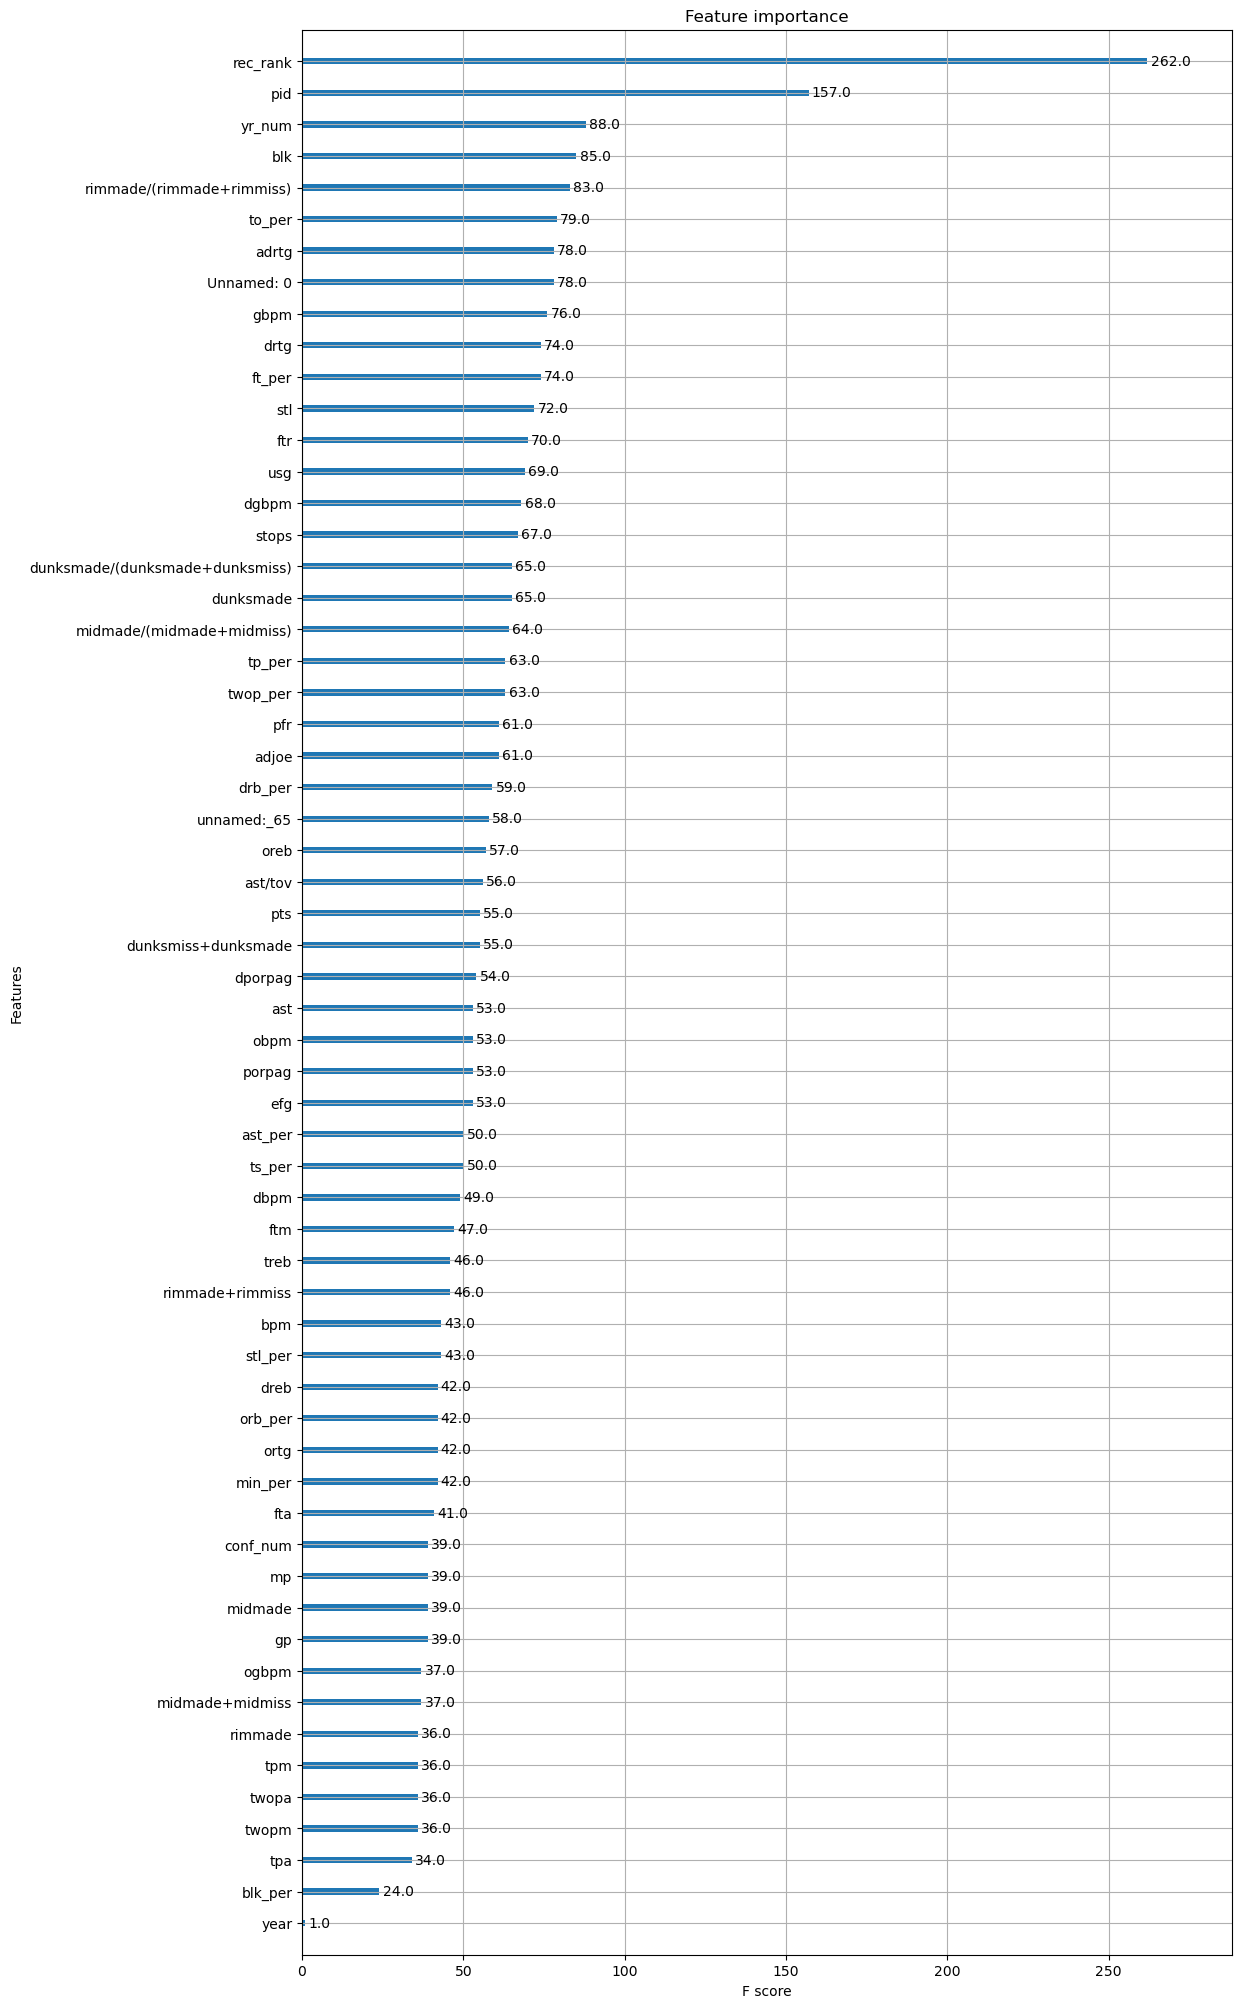

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

xgb_model= XGBClassifier()
xgb_model.fit(X,y)

##Plot importance
plt.rcParams["figure.figsize"] = (12, 25)
plot_importance(xgb_model)
pyplot.show()

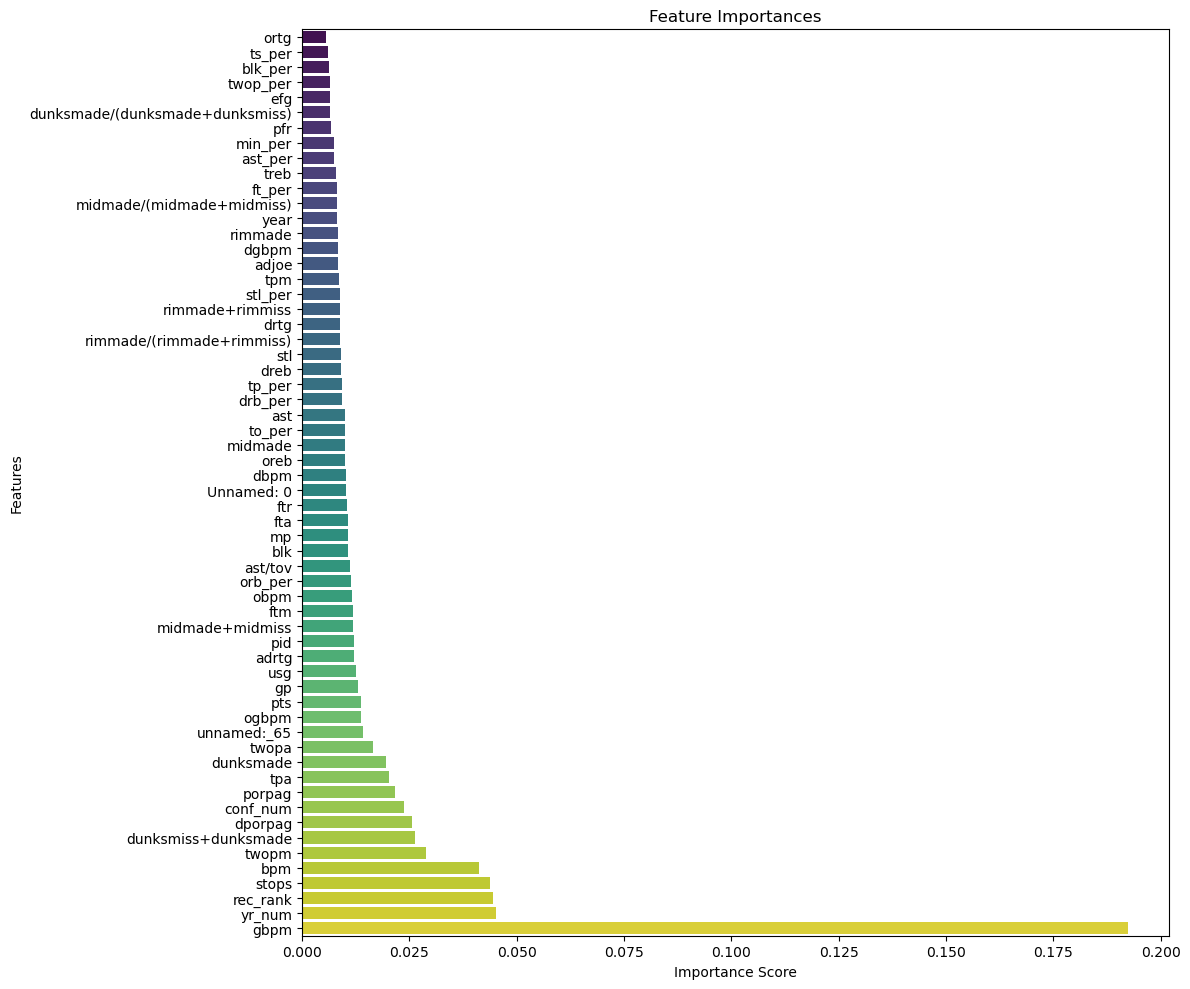

In [35]:
#all numerical features
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_features_sorted, palette='viridis')

plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

In [32]:
feature_importances = xgb_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importance_features = features_df.sort_values(by='Importance', ascending=False)

In [34]:
importance_features_sorted = importance_features.sort_values(by='Importance', ascending=True)

importance_features_sorted_top_20  = importance_features.sort_values(by='Importance', ascending=False).head(20)
importance_features_sorted_top_20

,Feature,Importance
46,gbpm,0.192339
59,yr_num,0.045093
28,rec_rank,0.044562
42,stops,0.043869
43,bpm,0.041335
14,twopm,0.028792
37,dunksmiss+dunksmade,0.026260
41,dporpag,0.025686
58,conf_num,0.023836
23,porpag,0.021759


In [36]:
top_20= X[['rec_rank','stops','dporpag','gbpm','porpag','bpm' ,'yr_num','ogbpm','adrtg', 'adjoe','dunksmade','pid','gp','unnamed:_65','twopm','dunksmiss+dunksmade','dbpm','tpa','twopa','drtg']]
top_20.head()

,rec_rank,stops,dporpag,gbpm,porpag,bpm,yr_num,ogbpm,adrtg,adjoe,dunksmade,pid,gp,unnamed:_65,twopm,dunksmiss+dunksmade,dbpm,tpa,twopa,drtg
0,17.2,172.9700,2.03664,-3.80561,0.881212,-3.658810,4,-1.892540,108.0200,92.1620,6.225854,20,30,3.34007,128,6.955346,-1.732890,55,281,101.0070
1,83.4,127.8190,2.64074,3.52291,2.051430,6.367710,4,1.965260,94.3229,109.0820,6.225854,22,34,3.14112,72,6.955346,2.279450,43,136,100.2660
2,64.0,206.9930,3.49024,3.86154,1.701770,5.295540,4,0.740255,92.8183,100.5760,6.225854,29,35,5.19900,47,6.955346,2.736860,94,116,95.5957
3,3.2,30.6622,1.30540,1.20714,1.670630,0.168302,3,2.496660,104.1110,112.6210,6.225854,32,12,7.84619,17,6.955346,-1.942630,26,32,103.5920
4,16.2,118.6960,2.02853,-2.68634,1.110010,-1.301760,3,-2.755600,101.1230,98.0255,6.225854,36,27,0.00000,70,6.955346,0.971185,0,149,98.7930


<Axes: >

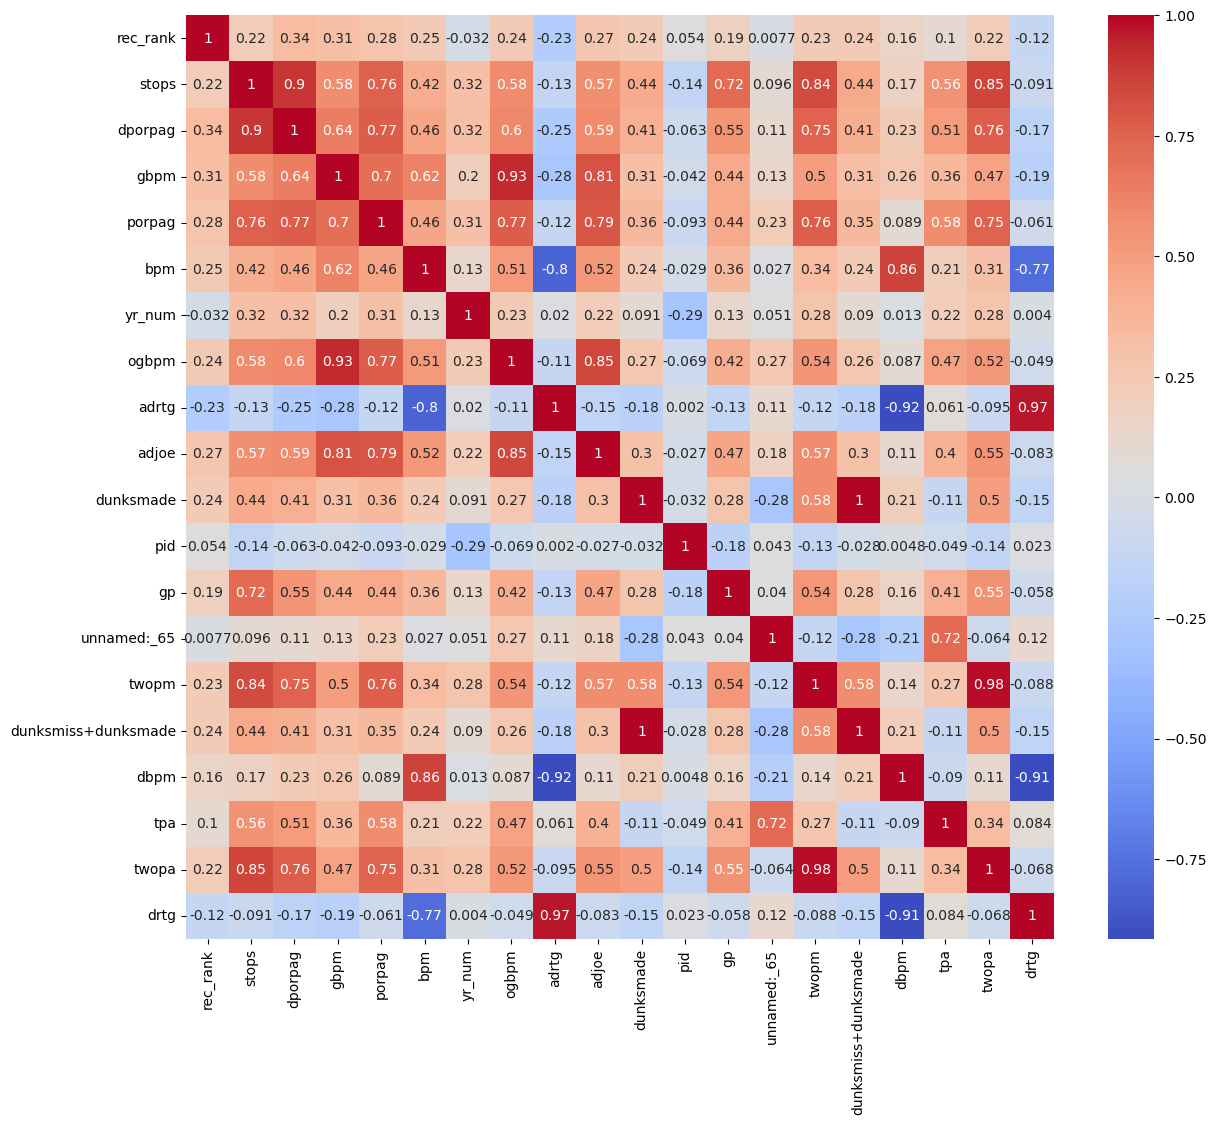

In [37]:
##correlation matrix for top 20features
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(top_20.corr(),cmap="coolwarm",annot=True)

In [38]:
##check status of drafted for each conference
.crosstab(cb_stats_09_21_draft_clean['conf'],cb_stats_09_21_draft_clean['drafted'])

drafted,0,1
conf,,
A10,1005,27
ACC,1462,261
AE,162,0
ASun,226,0
Amer,670,30
B10,1487,166
B12,1034,167
BE,1313,148
BSky,221,11


In [39]:
##analysis to convert conference to numeric
conf_agg=pd.pivot_table(cb_stats_09_21_draft_clean.loc[cb_stats_09_21_draft_clean['drafted']==1], index='conf',values='drafted',aggfunc='count').sort_values(by='drafted',ascending=False)
conf_agg

,drafted
conf,
ACC,261
SEC,195
B12,167
B10,166
BE,148
P12,141
MWC,56
P10,41
Amer,30


# Run methods to select Features

In [ ]:
###see update methods and features notebook

In [41]:
##first run top 30 feature importance
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


# Specified columns for the model
specified_columns = [
    'rec_rank', 'blk', 'ft_per', 'yr_num', 'ftr', 'midmade/(midmade+midmiss)', 'year', 'to_per',
    'drtg', 'obpm', 'adrtg', 'tp_per', 'usg', 'ast/tov', 'pfr', 'stl', 'rimmade/(rimmade+rimmiss)',
    'drb_per', 'dporpag', 'ast', 'adjoe', 'stops', 'pts', 'dunksmade', 'gbpm', 'efg', 'oreb', 'dgbpm', 'porpag',
    'drafted'  # Target variable
]

# Prepare the features (X) and target (y)
X = cb_draft_num[specified_columns[:-1]]  # All columns except 'drafted'
y = cb_draft_num['drafted']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Convert the dataset into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Setting the hyperparameters
params = {
    'max_depth':  10,
    'min_child_weight': 15,
    'learning_rate': .03 ,
    'eta': 0.4,
    #'objective': 'multi:softmax',  # for multiclass classification
    'num_class': 5
}

# Training the XGBoost model
num_round = 150
model = xgb.train(params, dtrain, num_round)

# Making predictions
predictions = model.predict(dtest)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9490616621983914


In [42]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9434004048646718
Recall: 0.9490616621983914
F1-score: 0.9437438736574183


In [43]:
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5176
           1       0.75      0.48      0.58       419

    accuracy                           0.95      5595
   macro avg       0.86      0.73      0.78      5595
weighted avg       0.94      0.95      0.94      5595



In [44]:
##2nd run using top common features from alll methods (24)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


# Specified columns for the model
specified_columns = [
    'rec_rank', 'blk', 'ft_per', 'yr_num', 'ftr', 'midmade/(midmade+midmiss)', 'to_per',
     'tp_per', 'usg', 'rimmade/(rimmade+rimmiss)','unnamed:_65','dunksmade','gbpm', 'efg','oreb','dgbpm',
    'twop_per', 'dreb', 'ast_per', 'ftm', 'min_per','conf_num', 'gp', 'tpm', 
    'drafted'  # Target variable
]

# Prepare the features (X) and target (y)
X = cb_draft_num[specified_columns[:-1]]  # All columns except 'drafted'
y = cb_draft_num['drafted']
X.head(2)

,rec_rank,blk,ft_per,yr_num,ftr,midmade/(midmade+midmiss),to_per,tp_per,usg,rimmade/(rimmade+rimmiss),unnamed:_65,dunksmade,gbpm,efg,oreb,dgbpm,twop_per,dreb,ast_per,ftm,min_per,conf_num,gp,tpm
0,17.2,0.1000,0.533,4,35.7,0.335286,14.5,0.218,23.0,0.591466,3.34007,6.225854,-3.80561,43.5,1.7333,-1.91307,0.456,3.4667,11.9,64,80.4,1,30,12
1,83.4,0.4706,0.647,4,19.0,0.335286,18.7,0.419,13.7,0.591466,3.14112,6.225854,3.52291,55.3,2.0000,1.55765,0.529,2.2941,4.9,22,57.9,7,34,18


In [45]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Convert the dataset into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [46]:
# Setting the hyperparameters
params = {
    'max_depth':  6,
    'min_child_weight': 2.660567739518253,
    'learning_rate': 0.09312179944362281 ,
    'subsample': 0.7258067119502901,
    'eta': 4.816437063986812,
    'num_class': 2
}

In [47]:
# Training the XGBoost model
num_round =200
model = xgb.train(params, dtrain, num_round)

# Making predictions
predictions = model.predict(dtest)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9497765862377122


In [48]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9445880962941522
Recall: 0.9497765862377122
F1-score: 0.9454374456411733


In [49]:
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5176
           1       0.74      0.51      0.60       419

    accuracy                           0.95      5595
   macro avg       0.85      0.75      0.79      5595
weighted avg       0.94      0.95      0.95      5595



In [ ]:
##check for best hyperparamters
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'min_child_weight': stats.uniform(0.5,20),
    'eta': stats.uniform(0,5)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

## Updated Approach- Final XGBoost Model
### Use select features from weighted sum method from 7 methods
### Balance data

In [3]:
## college basketball stats 2009-2021 & drafted players into seperate dataframes
cb_stats_final = pd.read_excel('cb_select_features_final.xlsx')

# Display basic information and the first few rows of the dataset
cb_stats_final.head(5)

,Unnamed: 0.1,Unnamed: 0,rec_rank,blk,ft_per,yr_num,ftr,to_per,tp_per,usg,dporpag,obpm,adrtg,adjoe,stops,pts,gbpm,dgbpm,twop_per,dreb,ftm,min_per,gp,conf_num,drafted
0,0,0,0.0,0.0385,0.714,0,13.1,16.3,0.333,16.6,0.893017,-1.623360,108.527,89.3938,49.9644,3.8846,-4.723150,-1.941150,0.382,0.6154,10,29.5,26,4,0
1,1,1,0.0,0.2353,0.667,0,27.4,19.8,0.392,14.9,1.880030,1.385490,104.017,100.0660,111.9290,5.9412,-0.300196,-0.247934,0.496,1.2647,30,60.9,34,4,0
2,2,2,0.0,0.0000,0.672,1,21.5,15.9,0.325,21.8,2.763870,1.024770,102.154,104.1070,115.0210,12.1852,0.665065,-0.883163,0.427,2.3333,45,72.0,27,7,0
3,3,3,0.0,0.1333,0.519,1,21.6,23.8,0.452,16.0,1.218710,-0.502574,106.556,93.2086,84.1698,4.9333,-0.736233,-0.393459,0.397,1.4333,14,44.5,30,5,0
4,4,4,0.0,0.3333,0.561,1,64.8,22.7,0.000,22.0,1.992790,-1.946040,100.724,97.8554,128.0280,7.5758,-2.353180,-0.668318,0.528,3.3030,64,56.2,33,3,0


In [4]:
cb_stats_final.shape

(61061, 25)

In [5]:
# Remove unnecessary columns
cb_stats_final = cb_stats_final.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Define the feature columns as specified (removing 'Unnamed: 0.1' and 'Unnamed: 0')
feature_columns = [
    'rec_rank', 'blk', 'ft_per', 'yr_num', 'ftr', 'to_per',
     'obpm', 'adrtg', 'tp_per','usg','dporpag', 'adjoe','stops','pts',
    'gbpm', 'dgbpm', 'twop_per', 'dreb','ftm', 'min_per', 'conf_num', 'gp', 
    'drafted'
]

# Define features and target
X = cb_stats_final.drop('drafted', axis=1)
y = cb_stats_final['drafted']

from sklearn.model_selection import train_test_split

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Confirm the split
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((45795, 22), (15266, 22)), ((45795,), (15266,)))

In [6]:
import numpy as np

# Identify non-drafted and drafted records in the training data
non_drafted = X_train[y_train == 0]
drafted = X_train[y_train == 1]

# Randomly select 4.5% of the non-drafted records
np.random.seed(42)  
selected_non_drafted = non_drafted.sample(frac=0.045)

# Combine selected non-drafted with all drafted records
new_X_train = pd.concat([selected_non_drafted, drafted])
new_y_train = y_train.loc[new_X_train.index]

# Check the balance and shape of the new training data
new_X_train.shape, new_y_train.value_counts()

((3088, 22),
 drafted
 0    2012
 1    1076
 Name: count, dtype: int64)

In [7]:
# Check the balance of drafted vs non-drafted in the new training data
new_y_train.value_counts(normalize=True)

drafted
0    0.651554
1    0.348446
Name: proportion, dtype: float64

In [8]:
##check for best hyperparamters
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'min_child_weight': stats.uniform(0.5,20),
    'eta': stats.uniform(0.01,0.3)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(new_X_train, new_y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'eta': 0.1771313034479818, 'learning_rate': 0.07112508881409278, 'max_depth': 4, 'min_child_weight': 5.949741455780863, 'subsample': 0.6436925131282879}
Best score:  0.9119185116415688


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

# Setting the hyperparameters to match optimal
params = {
    'max_depth':  4,
    'min_child_weight': 5.949741455780863,
    'learning_rate':0.07112508881409278 ,
    'subsample': 0.6436925131282879,
    'eta': 0.1771313034479818,
    'num_class': 2
}

In [14]:
# Convert the dataset into DMatrix format
dtrain = xgb.DMatrix(new_X_train, label=new_y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
# Training the XGBoost model
num_round =1000
model = xgb.train(params, dtrain, num_round)

# Making predictions
predictions = model.predict(dtest)
predictions = (predictions > 0.5).astype(int)
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9252587449233591


In [15]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9787871090870036
Recall: 0.9252587449233591
F1-score: 0.9461390856464081


In [16]:
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     14907
           1       0.22      0.88      0.36       359

    accuracy                           0.93     15266
   macro avg       0.61      0.90      0.66     15266
weighted avg       0.98      0.93      0.95     15266

